# CNN

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
Data_path="Datasets/"

## Reshape images in ANN

In [3]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)

x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)

print("X_train new shape", x_train.shape)
print("X_test new shape", x_test.shape)

X_train shape (60000, 28, 28)
X_test shape (10000, 28, 28)
X_train new shape (60000, 784)
X_test new shape (10000, 784)


In [4]:
num_classes=10
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)

model = keras.Sequential()
model.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model.add(layers.Dense(20, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train,epochs=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 39us/sample - loss: 1.0009 - accuracy: 0.7708
Epoch 2/2
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3581 - accuracy: 0.9027


## Convolution Layer

In [5]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)

X_train shape (60000, 28, 28)
X_test shape (10000, 28, 28)


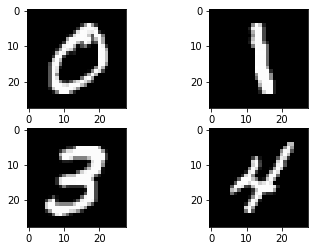

In [6]:
# Plot 4 images as gray scale

%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[6], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[7], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[9], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

## Random kernel_initializer

Actual Image


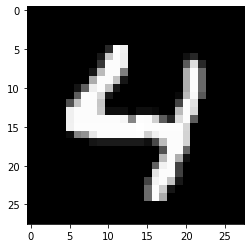

Random Weights Kennel


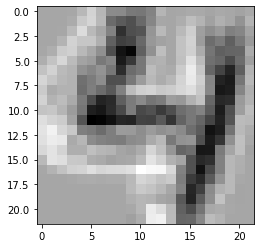

In [7]:
#i=int(np.random.rand(1,1)*60000)
#634 #924 #952 #3611  #4458
import numpy as np
x=X_train[3611]


print("Actual Image")
plt.imshow(x, cmap=plt.get_cmap('gray'))
plt.show()


print("Random Weights Kennel")
from tensorflow.keras.layers import Conv2D
model=Sequential()
model.add(Conv2D(filters=1,
                 kernel_size=7,
                 input_shape=(28,28,1),
                 kernel_initializer='random_uniform'))

img_reshape=np.expand_dims(x, axis=0)
img_reshape=np.expand_dims(img_reshape, axis=3)
img_reshape=model.predict(img_reshape)
pixels = np.matrix(img_reshape[:][:][:][0])
plt.imshow(pixels,cmap=plt.get_cmap('gray'))
plt.show()

### Constant kernel_initializer

In [8]:
import numpy as np
filter1=np.array([[1,1,1,1,1,1,1],
           [1,1,1,1,1,1,1],
           [100,100,100,100,100,100,100],
           [100,100,100,100,100,100,100],
           [100,100,100,100,100,100,100],
           [1,1,1,1,1,1,1],
           [1,1,1,1,1,1,1]])
print("filter1 \n", filter1)

filter2=np.transpose(filter1)
print("filter2 \n",filter2)

filter1 
 [[  1   1   1   1   1   1   1]
 [  1   1   1   1   1   1   1]
 [100 100 100 100 100 100 100]
 [100 100 100 100 100 100 100]
 [100 100 100 100 100 100 100]
 [  1   1   1   1   1   1   1]
 [  1   1   1   1   1   1   1]]
filter2 
 [[  1   1 100 100 100   1   1]
 [  1   1 100 100 100   1   1]
 [  1   1 100 100 100   1   1]
 [  1   1 100 100 100   1   1]
 [  1   1 100 100 100   1   1]
 [  1   1 100 100 100   1   1]
 [  1   1 100 100 100   1   1]]


Actual Image


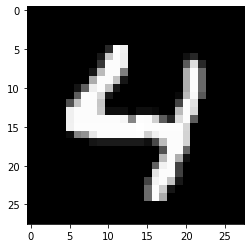

Horizontal Line


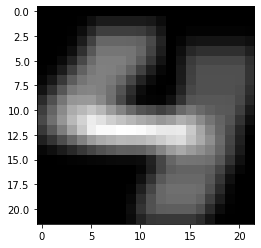

Vertical Line


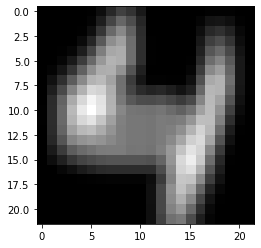

In [9]:
#Try #634 #924 #952 #3611  #4458
x=X_train[3611]

print("Actual Image")
plt.imshow(x, cmap=plt.get_cmap('gray'))
plt.show()

print("Horizontal Line")

model=Sequential()
model.add(Conv2D(1,
                 kernel_size=7,
                 input_shape=(28,28,1),
                 kernel_initializer=keras.initializers.Constant(filter1)))

img_reshape=np.expand_dims(x, axis=0)
img_reshape=np.expand_dims(img_reshape, axis=3)
img_reshape=model.predict(img_reshape)
pixels = np.matrix(img_reshape[:][:][:][0])
plt.imshow(pixels,cmap=plt.get_cmap('gray'))
plt.show()

print("Vertical Line")
model=Sequential()
model.add(Conv2D(1,
                 kernel_size=7,
                 input_shape=(28,28,1),
                 kernel_initializer=keras.initializers.Constant(filter2)))

img_reshape=np.expand_dims(x, axis=0)
img_reshape=np.expand_dims(img_reshape, axis=3)
img_reshape=model.predict(img_reshape)
pixels = np.matrix(img_reshape[:][:][:][0])
plt.imshow(pixels,cmap=plt.get_cmap('gray'))
plt.show()

### Filters for Colour Images

5013
imp_path Datasets/43534.png
(32, 32, 3)
[[[12.156863  10.666667   8.235294 ]
  [12.941177   9.176471   7.6862745]
  [13.490196   8.862745   8.       ]
  [11.372549   7.372549   6.27451  ]
  [11.607843   7.6862745  6.666667 ]]

 [[11.843138  10.745098   8.078431 ]
  [13.960785  10.82353    8.941176 ]
  [14.901961   9.960784   9.019608 ]
  [13.411765   8.941176   7.921569 ]
  [10.901961   6.666667   5.7254906]]

 [[11.6862755 10.745098   8.       ]
  [13.803922  11.058825   9.09804  ]
  [14.745098   9.725491   9.09804  ]
  [15.686275  11.215687  10.82353  ]
  [11.294118   7.0588236  6.745098 ]]

 [[11.294118  10.509805   7.764706 ]
  [12.235294  10.3529415  8.156863 ]
  [13.254902   9.725491   8.784314 ]
  [17.960785  15.215687  14.901961 ]
  [15.764706  13.09804   12.862745 ]]

 [[11.294118  10.666667   7.8431373]
  [12.078432  11.058825   8.470589 ]
  [14.039216  12.313726  10.509805 ]
  [18.117647  16.62745   15.921569 ]
  [17.960785  16.078432  15.764706 ]]]
(5, 5, 3)


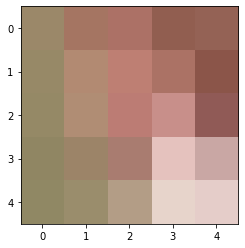

In [10]:
i=int(np.random.rand(1,1)*60000)
print(i)

imp_path=Data_path+"43534.png"
print("imp_path",imp_path)

%matplotlib inline
x=plt.imread(imp_path)
print(x.shape)
y=x[10:15,10:15]
print(y*20)
print(y.shape)
plt.imshow((y*255).astype(np.uint8))

## Zero Padding 

Actual Image Shape  (28, 28)


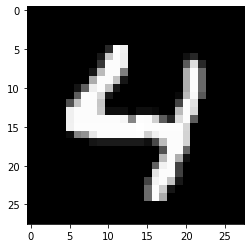

Random Weights Kennel siz3 7X7
Output Shape  (22, 22)


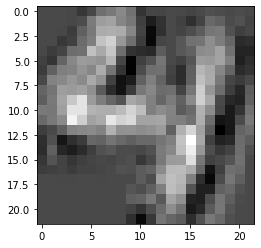

Random Weights Kennel siz3 5X5
Output Shape  (24, 24)


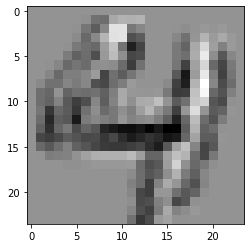

In [11]:
#i=int(np.random.rand(1,1)*60000)
#634 #924 #952 #3611  #4458
import numpy as np
x=X_train[3611]

print("Actual Image Shape " ,  x.shape)
plt.imshow(x, cmap=plt.get_cmap('gray'))
plt.show()


print("Random Weights Kennel siz3 7X7")
from tensorflow.keras.layers import Conv2D
model=Sequential()
model.add(Conv2D(filters=1,
                 kernel_size=7,
                 input_shape=(28,28,1),
                 kernel_initializer='random_uniform'))

img_reshape=np.expand_dims(x, axis=0)
img_reshape=np.expand_dims(img_reshape, axis=3)
img_reshape=model.predict(img_reshape)
pixels = np.matrix(img_reshape[:][:][:][0])
print("Output Shape " ,pixels.shape)
plt.imshow(pixels,cmap=plt.get_cmap('gray'))
plt.show()


print("Random Weights Kennel siz3 5X5")
from tensorflow.keras.layers import Conv2D
model=Sequential()
model.add(Conv2D(filters=1,
                 kernel_size=5,
                 input_shape=(28,28,1),
                 kernel_initializer='random_uniform'))

img_reshape=np.expand_dims(x, axis=0)
img_reshape=np.expand_dims(img_reshape, axis=3)
img_reshape=model.predict(img_reshape)
pixels = np.matrix(img_reshape[:][:][:][0])
print("Output Shape " ,pixels.shape)
plt.imshow(pixels,cmap=plt.get_cmap('gray'))
plt.show()

## CNN for CIFAR10

In [12]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [13]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train=X_train/255
X_test=X_test/255

170500096/170498071 [==============================] - 6s 0us/step


In [14]:
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_train.shape (50000, 32, 32, 3)
y_train.shape (50000, 1)
X_test.shape (10000, 32, 32, 3)
y_test.shape (10000, 1)


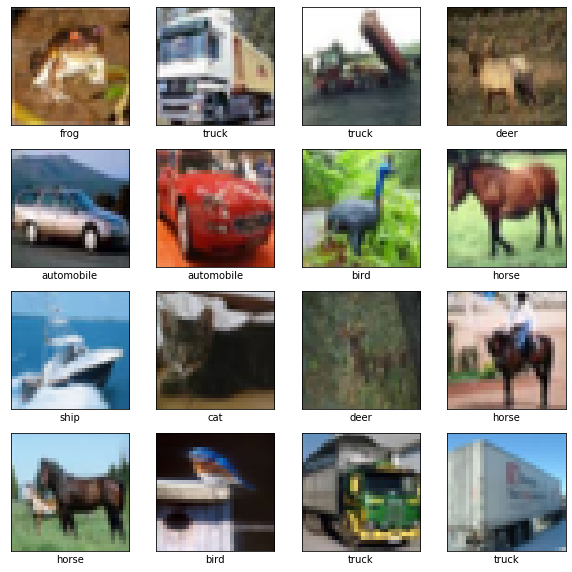

In [15]:
#Drawing Few images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [17]:
import time #To measure the execution time 
start = time.time()

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train, y_train, 
          batch_size=16,
          epochs=12, 
          validation_data=(X_test, y_test))

end = time.time()
print("Execution time is", int(end - start), "seconds")

Train on 50000 samples, validate on 10000 samples
Epoch 1/12
50000/50000 [==============================] - 43s 863us/sample - loss: 1.8022 - accuracy: 0.3407 - val_loss: 1.5440 - val_accuracy: 0.4367
Epoch 2/12
50000/50000 [==============================] - 43s 859us/sample - loss: 1.3931 - accuracy: 0.4987 - val_loss: 1.2796 - val_accuracy: 0.5508
Epoch 3/12
50000/50000 [==============================] - 43s 853us/sample - loss: 1.2231 - accuracy: 0.5663 - val_loss: 1.1926 - val_accuracy: 0.5784
Epoch 4/12
50000/50000 [==============================] - 43s 868us/sample - loss: 1.1001 - accuracy: 0.6114 - val_loss: 1.0486 - val_accuracy: 0.6404
Epoch 5/12
50000/50000 [==============================] - 40s 802us/sample - loss: 0.9964 - accuracy: 0.6483 - val_loss: 1.0227 - val_accuracy: 0.6435
Epoch 6/12
50000/50000 [==============================] - 42s 832us/sample - loss: 0.9107 - accuracy: 0.6804 - val_loss: 0.9782 - val_accuracy: 0.6610
Epoch 7/12
50000/50000 [====================

## Case Study- Sign Language Reading from Images 

In [20]:
#Let us keep all the libraries ready
import tensorflow.keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D,  Activation
from tensorflow.keras.layers import Reshape, Input, Lambda
from tensorflow.keras.layers import Conv2D, Convolution2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Concatenate, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import regularizers, initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
from matplotlib.pyplot import imshow, imsave
import imageio
import random

FileNotFoundError: No such file: '/Users/shuang/Documents/GitHub/ML_DL_py_TF/Chapter11_CNN/Datasets/Sign_Language_Digits/Sign-Language-Digits-Dataset-master/Dataset/2/IMG_1120.JPG'

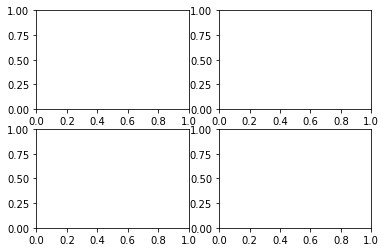

In [22]:
#Few random Images
fig, ax = plt.subplots(2,2)
location=Data_path+'Sign_Language_Digits/Sign-Language-Digits-Dataset-master/Dataset/'
i=random.randint(0, 9)
img_id=18+i
img=imageio.imread(location+str(i)+"/IMG_11"+str(img_id)+".JPG")
ax[0,0].imshow(img)

i=random.randint(0, 9)
img_id=18+i
img=imageio.imread(location+str(i)+"/IMG_11"+str(img_id)+".JPG")
ax[0,1].imshow(img)

i=random.randint(0, 9)
img_id=18+i
img=imageio.imread(location+str(i)+"/IMG_11"+str(img_id)+".JPG")
ax[1,0].imshow(img)

i=random.randint(0, 9)
img_id=18+i
img=imageio.imread(location+str(i)+"/IMG_11"+str(img_id)+".JPG")
ax[1,1].imshow(img)

In [23]:
########################
# Generators
########################

from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 256
target_size = (100,100)


########################
# Data Directory
########################

data_dir = location  # this is the image datasets directory
location_1=Data_path+"Sign_language_digits_dataset_64_64/"
########################
# Data generator : Any preprocessing options/steps can be  defined here
########################
datagen = ImageDataGenerator(rescale = 1./255,  # scaling the images matrix(standard preprocessing step)
                             validation_split=0.2) # set validation split

########################
# Train generator
########################
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=target_size,   # resizing the input images to a specific size
    batch_size=batch_size,     # Batch size, iterator will generate a random batch with this size
    color_mode = 'grayscale',  # keeping the channel to grayscale for easy calculations
    class_mode='categorical',
    shuffle=True,
    subset="training") 

########################
# Validation generator
########################

validation_generator = datagen.flow_from_directory(
    data_dir, # same directory as training data
    target_size=target_size,
    batch_size=batch_size,
    color_mode = 'grayscale', 
    class_mode='categorical',
    shuffle=True,
    subset="validation") # set as validation data

Found 1652 images belonging to 10 classes.
Found 409 images belonging to 10 classes.


In [24]:
model1 = Sequential()

# Convolution layer
model1.add(Conv2D(64, (3, 3), input_shape = (100, 100, 1), activation = 'relu'))

# Pooling layer
model1.add(MaxPooling2D(pool_size = (2, 2)))

# Adding second convolutional layer
model1.add(Conv2D(64, (3, 3), activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))

# Adding third convolutional layer
model1.add(Conv2D(64, (3, 3), activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
model1.add(Flatten())

# Step 4 - Fully connected dense layers
model1.add(Dense(units = 256, activation = 'relu'))
model1.add(Dense(units = 10, activation = 'softmax'))

model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 98, 98, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)             

In [25]:
# model1 compilation
model1.compile(optimizer =SGD(lr=0.01, momentum = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

########################
# fit model and train
########################

import time
start = time.time()

model1.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), #total number of batches in one train epoch(train observation/batch size; also called iterations per epoch)
        epochs=20,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), #total number of batches in validation(validation observation/batch size)
        verbose=1)

model1.save_weights('m1_Sign_Language_20epochs.h5')

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/20
7/7 [==============================] - 20s 3s/step - loss: 2.3051 - accuracy: 0.1192 - val_loss: 2.3008 - val_accuracy: 0.1394
Epoch 2/20
7/7 [==============================] - 17s 2s/step - loss: 2.3000 - accuracy: 0.1259 - val_loss: 2.2988 - val_accuracy: 0.1051
Epoch 3/20
7/7 [==============================] - 17s 2s/step - loss: 2.2968 - accuracy: 0.1047 - val_loss: 2.2966 - val_accuracy: 0.1002
Epoch 4/20
7/7 [==============================] - 17s 2s/step - loss: 2.2923 - accuracy: 0.1846 - val_loss: 2.2936 - val_accuracy: 0.2274
Epoch 5/20
7/7 [==============================] - 17s 2s/step - loss: 2.2872 - accuracy: 0.1671 - val_loss: 2.2885 - val_accuracy: 0.1320
Epoch 6/20
7/7 [==============================] - 18s 3s/step - loss: 2.2824 - accuracy: 0.1943 - val_loss: 2.2831 - val_accuracy: 0.1663
Epoch 7/20
7/7 [==============================] - 17s 2s/step - loss: 2.2731 - accuracy: 0.2785 - val_loss: 2.2742 - val_accuracy: 0.2249
Epoch 8/20
7/7 [==================

In [26]:
model1.load_weights(Data_path+"/Pre_trained_models/m1_Sign_Language_20epochs.h5")

model1.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), 
        epochs=2,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), 
        verbose=1)

Epoch 1/2
7/7 [==============================] - 18s 3s/step - loss: 0.3383 - accuracy: 0.8868 - val_loss: 1.8195 - val_accuracy: 0.5819
Epoch 2/2
7/7 [==============================] - 17s 2s/step - loss: 0.3233 - accuracy: 0.8941 - val_loss: 2.2363 - val_accuracy: 0.5575


In [27]:
model1.load_weights(Data_path+"/Pre_trained_models/m1_Sign_Language_50epochs.h5")

model1.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), 
        epochs=2,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), 
        verbose=1)

Epoch 1/2
7/7 [==============================] - 18s 3s/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 2.2228 - val_accuracy: 0.6430
Epoch 2/2
7/7 [==============================] - 17s 2s/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 2.0968 - val_accuracy: 0.6455


# Model2 - Model with Receptive field 

Change the image shape to 64X64 

In [28]:
########################
# Generators
########################

from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 256
target_size = (64,64)


########################
# Data Directory
########################

data_dir = location  # this is the image datasets directory

########################
# Data generator : Any preprocessing options/steps can be  defined here
########################
datagen = ImageDataGenerator(rescale = 1./255,  # scaling the images matrix(standard preprocessing step)
                             validation_split=0.2) # set validation split

########################
# Train generator
########################
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=target_size,   # resizing the input images to a specific size
    batch_size=batch_size,     # Batch size, iterator will generate a random batch with this size
    color_mode = 'grayscale',  # keeping the channel to grayscale for easy calculations
    class_mode='categorical',
    shuffle=True,
    subset="training") # set as training data

########################
# Validation generator
########################

validation_generator = datagen.flow_from_directory(
    data_dir, # same directory as training data
    target_size=target_size,
    batch_size=batch_size,
    color_mode = 'grayscale', 
    class_mode='categorical',
    shuffle=True,
    subset="validation") # set as validation data

Found 1652 images belonging to 10 classes.
Found 409 images belonging to 10 classes.


In [29]:
model2 = Sequential()

# Convolution and Pooling layers
model2.add(Conv2D(16, (3, 3), input_shape = (64, 64, 1), activation = 'relu'))
model2.add(Conv2D(32, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))


model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Conv2D(128, (3, 3), activation = 'relu'))
model2.add(Conv2D(128, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))


# Flattening and  Fully connected dense layers
model2.add(Flatten())
model2.add(Dense(units = 32, activation = 'relu'))
model2.add(Dense(units = 10, activation = 'softmax'))

model2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 62, 62, 16)        160       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 60, 60, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 128)      

In [30]:
# model compilation
model2.compile(optimizer =SGD(lr=0.01, momentum = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

########################
# fit model and train
########################

import time
start = time.time()

model2.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), #total number of batches in one train epoch(train observation/batch size; also called iterations per epoch)
        epochs=50,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), #total number of batches in validation(validation observation/batch size)
        verbose=1)

model2.save_weights('m2_Receptive_field_50epochs.h5')

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/50
7/7 [==============================] - 10s 1s/step - loss: 2.3031 - accuracy: 0.1017 - val_loss: 2.3026 - val_accuracy: 0.1051
Epoch 2/50
7/7 [==============================] - 10s 1s/step - loss: 2.3021 - accuracy: 0.1011 - val_loss: 2.3023 - val_accuracy: 0.1002
Epoch 3/50
7/7 [==============================] - 10s 1s/step - loss: 2.3014 - accuracy: 0.1029 - val_loss: 2.3015 - val_accuracy: 0.1125
Epoch 4/50
7/7 [==============================] - 10s 1s/step - loss: 2.3005 - accuracy: 0.1102 - val_loss: 2.3008 - val_accuracy: 0.1198
Epoch 5/50
7/7 [==============================] - 10s 1s/step - loss: 2.2995 - accuracy: 0.1120 - val_loss: 2.2997 - val_accuracy: 0.1002
Epoch 6/50
7/7 [==============================] - 10s 1s/step - loss: 2.2987 - accuracy: 0.1035 - val_loss: 2.2994 - val_accuracy: 0.1051
Epoch 7/50
7/7 [==============================] - 10s 1s/step - loss: 2.2974 - accuracy: 0.1120 - val_loss: 2.2985 - val_accuracy: 0.1589
Epoch 8/50
7/7 [==================

In [34]:
model2.load_weights("m2_Receptive_field_50epochs.h5")

model2.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), #total number of batches in one train epoch(train observation/batch size; also called iterations per epoch)
        epochs=2,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), #total number of batches in validation(validation observation/batch size)
        verbose=1)

Epoch 1/2
7/7 [==============================] - 10s 1s/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.8918 - val_accuracy: 0.7139
Epoch 2/2
7/7 [==============================] - 10s 1s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.8974 - val_accuracy: 0.7139


## Model2 - Model with Dropout and Receptive field 

Batchsize Changed 

In [35]:
########################
# Generators
########################

from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 64
target_size = (64,64)


########################
# Data Directory
########################

data_dir = location  # this is the image datasets directory

########################
# Data generator : Any preprocessing options/steps can be  defined here
########################
datagen = ImageDataGenerator(rescale = 1./255,  # scaling the images matrix(standard preprocessing step)
                             validation_split=0.2) # set validation split

########################
# Train generator
########################
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=target_size,   # resizing the input images to a specific size
    batch_size=batch_size,     # Batch size, iterator will generate a random batch with this size
    color_mode = 'grayscale',  # keeping the channel to grayscale for easy calculations
    class_mode='categorical',
    shuffle=True,
    subset="training") # set as training data

########################
# Validation generator
########################

validation_generator = datagen.flow_from_directory(
    data_dir, # same directory as training data
    target_size=target_size,
    batch_size=batch_size,
    color_mode = 'grayscale', 
    class_mode='categorical',
    shuffle=True,
    subset="validation") # set as validation data

Found 1652 images belonging to 10 classes.
Found 409 images belonging to 10 classes.


In [36]:
model2 = Sequential()

# Convolution and Pooling layers
model2.add(Conv2D(16, (3, 3), input_shape = (64, 64, 1), activation = 'relu'))
model2.add(Conv2D(32, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.5))

model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.5))

model2.add(Conv2D(128, (3, 3), activation = 'relu'))
model2.add(Conv2D(128, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.5))


# Flattening and  Fully connected dense layers
model2.add(Flatten())
model2.add(Dense(units = 32, activation = 'relu'))
model2.add(Dropout(0.5))

model2.add(Dense(units = 10, activation = 'softmax'))

model2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 62, 62, 16)        160       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 60, 60, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 64)       

In [37]:
# model compilation
model2.compile(optimizer =SGD(lr=0.01, momentum = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

########################
# fit model and train
########################

import time
start = time.time()

history=model2.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), 
        epochs=50,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), 
        verbose=1)

model2.save_weights('m2_Dropout_Rec_fld_50epochs.h5')

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/50
26/26 [==============================] - 11s 437ms/step - loss: 2.3146 - accuracy: 0.0950 - val_loss: 2.3028 - val_accuracy: 0.1002
Epoch 2/50
26/26 [==============================] - 13s 483ms/step - loss: 2.3044 - accuracy: 0.1029 - val_loss: 2.3027 - val_accuracy: 0.1002
Epoch 3/50
26/26 [==============================] - 11s 426ms/step - loss: 2.3030 - accuracy: 0.1023 - val_loss: 2.3027 - val_accuracy: 0.1002
Epoch 4/50
26/26 [==============================] - 11s 429ms/step - loss: 2.3041 - accuracy: 0.0914 - val_loss: 2.3027 - val_accuracy: 0.1002
Epoch 5/50
26/26 [==============================] - 11s 436ms/step - loss: 2.3019 - accuracy: 0.1071 - val_loss: 2.3025 - val_accuracy: 0.0978
Epoch 6/50
26/26 [==============================] - 11s 429ms/step - loss: 2.3032 - accuracy: 0.0999 - val_loss: 2.3025 - val_accuracy: 0.0978
Epoch 7/50
26/26 [==============================] - 11s 440ms/step - loss: 2.3023 - accuracy: 0.1059 - val_loss: 2.3023 - val_accuracy: 0.1100

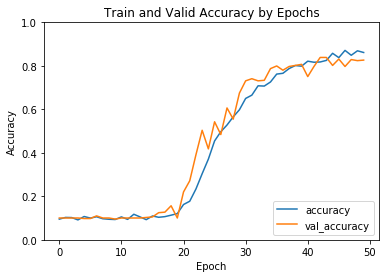

In [38]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title("Train and Valid Accuracy by Epochs")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

In [39]:
model2.load_weights(Data_path+"/Pre_trained_models/m2_Dropout_Rec_fld_50epochs.h5")

history=model2.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), 
        epochs=2,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), 
        verbose=1)

Epoch 1/2
26/26 [==============================] - 12s 469ms/step - loss: 0.4578 - accuracy: 0.8390 - val_loss: 0.5871 - val_accuracy: 0.8117
Epoch 2/2
26/26 [==============================] - 11s 432ms/step - loss: 0.4502 - accuracy: 0.8396 - val_loss: 0.6194 - val_accuracy: 0.8093


#### Dropout 100 epochs

In [40]:
model2.load_weights(Data_path+"/Pre_trained_models/m2_Dropout_Rec_fld_100epochs.h5")

history=model2.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), 
        epochs=2,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), 
        verbose=1)

Epoch 1/2
26/26 [==============================] - 11s 441ms/step - loss: 0.1602 - accuracy: 0.9407 - val_loss: 0.5048 - val_accuracy: 0.8509
Epoch 2/2
26/26 [==============================] - 11s 429ms/step - loss: 0.1390 - accuracy: 0.9510 - val_loss: 0.3897 - val_accuracy: 0.8680


## Batch Normalization

In [41]:
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape = (32, 32, 1)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(2, (3, 3)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(3, (3, 3)))
model.add(BatchNormalization())

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 30, 30, 1)         10        
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 1)         4         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 1)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 1)         4         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 13, 13, 2)         20        
_________________________________________________________________
batch_normalization_2 (Batch (None, 13, 13, 2)         8         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 6, 6, 2)         

## Model3 with Batch Normalization. 

In [42]:
model3 = Sequential()

model3.add(Conv2D(16, (3, 3), input_shape = (64, 64, 1), activation = 'relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Conv2D(16, (3, 3), activation = 'relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Conv2D(32, (3, 3), activation = 'relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Conv2D(32, (3, 3), activation = 'relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Conv2D(64, (3, 3), activation = 'relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Flatten())
model3.add(Dense(units = 16, activation = 'relu'))
model3.add(Dropout(0.5))
model3.add(Dense(units = 10, activation = 'softmax'))

model3.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 62, 62, 16)        160       
_________________________________________________________________
batch_normalization_5 (Batch (None, 62, 62, 16)        64        
_________________________________________________________________
dropout_4 (Dropout)          (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 60, 60, 16)        2320      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 30, 16)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 30, 30, 16)        64        
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 30, 16)      

In [43]:
model3.compile(optimizer =SGD(lr=0.03, momentum = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

########################
# fit model and train
########################

import time
start = time.time()

history=model3.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), 
        epochs=200,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), 
        verbose=1)

model3.save_weights('m3_BatchNorm_200epochs.h5')

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/200
26/26 [==============================] - 8s 326ms/step - loss: 2.5577 - accuracy: 0.1168 - val_loss: 4.2267 - val_accuracy: 0.1076
Epoch 2/200
26/26 [==============================] - 8s 322ms/step - loss: 2.1618 - accuracy: 0.1822 - val_loss: 6.5402 - val_accuracy: 0.1051
Epoch 3/200
26/26 [==============================] - 8s 322ms/step - loss: 2.0768 - accuracy: 0.2113 - val_loss: 2.4910 - val_accuracy: 0.1345
Epoch 4/200
26/26 [==============================] - 8s 316ms/step - loss: 2.0273 - accuracy: 0.2167 - val_loss: 2.4556 - val_accuracy: 0.1394
Epoch 5/200
26/26 [==============================] - 8s 320ms/step - loss: 1.9821 - accuracy: 0.2300 - val_loss: 2.7202 - val_accuracy: 0.1198
Epoch 6/200
26/26 [==============================] - 8s 325ms/step - loss: 1.9160 - accuracy: 0.2627 - val_loss: 3.4962 - val_accuracy: 0.0978
Epoch 7/200
26/26 [==============================] - 8s 316ms/step - loss: 1.9657 - accuracy: 0.2343 - val_loss: 3.4549 - val_accuracy: 0.1076

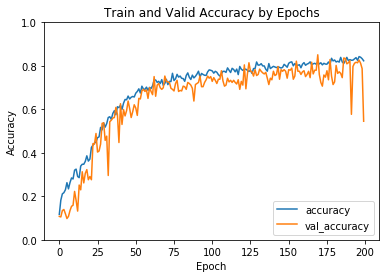

In [44]:
## Plotting the results 
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title("Train and Valid Accuracy by Epochs")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

In [45]:
model3.load_weights(Data_path+"/Pre_trained_models/m3_BatchNorm_200epochs.h5")

history=model3.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), 
        epochs=2,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), 
        verbose=1)

Epoch 1/2
26/26 [==============================] - 10s 384ms/step - loss: 0.5329 - accuracy: 0.8299 - val_loss: 0.7675 - val_accuracy: 0.7555
Epoch 2/2
26/26 [==============================] - 10s 380ms/step - loss: 0.5237 - accuracy: 0.8184 - val_loss: 0.5811 - val_accuracy: 0.8166


## Adam  Optimizer 

In [46]:
model3.compile(optimizer =Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999), loss = 'categorical_crossentropy', metrics = ['accuracy'])

########################
# fit model and train
########################

import time
start = time.time()

history=model3.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), 
        epochs=100,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), 
        verbose=1)

model3.save_weights('m3_BatchNorm_and_Adam_100epochs.h5')

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/100
26/26 [==============================] - 10s 399ms/step - loss: 0.5666 - accuracy: 0.8184 - val_loss: 0.7653 - val_accuracy: 0.7922
Epoch 2/100
26/26 [==============================] - 10s 390ms/step - loss: 0.5375 - accuracy: 0.8160 - val_loss: 0.7394 - val_accuracy: 0.7848
Epoch 3/100
26/26 [==============================] - 10s 380ms/step - loss: 0.5413 - accuracy: 0.8202 - val_loss: 0.8366 - val_accuracy: 0.7922
Epoch 4/100
26/26 [==============================] - 10s 380ms/step - loss: 0.5718 - accuracy: 0.8057 - val_loss: 1.8426 - val_accuracy: 0.6675
Epoch 5/100
26/26 [==============================] - 10s 378ms/step - loss: 0.4880 - accuracy: 0.8317 - val_loss: 1.3496 - val_accuracy: 0.7359
Epoch 6/100
26/26 [==============================] - 10s 382ms/step - loss: 0.5058 - accuracy: 0.8257 - val_loss: 0.9556 - val_accuracy: 0.7604
Epoch 7/100
26/26 [==============================] - 10s 380ms/step - loss: 0.5171 - accuracy: 0.8281 - val_loss: 1.1236 - val_accuracy:

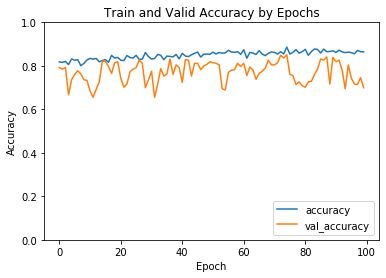

In [47]:
## Plotting the results 
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title("Train and Valid Accuracy by Epochs")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

In [48]:
model3.load_weights(Data_path+"/Pre_trained_models/m3_BatchNorm_and_Adam_100epochs.h5")

history=model3.fit_generator(
        train_generator, 
        steps_per_epoch = len(train_generator), 
        epochs=2,
        validation_data = validation_generator,
        validation_steps = len(validation_generator), 
        verbose=1)

Epoch 1/2
26/26 [==============================] - 10s 399ms/step - loss: 0.5992 - accuracy: 0.7918 - val_loss: 1.8067 - val_accuracy: 0.5697
Epoch 2/2
26/26 [==============================] - 10s 387ms/step - loss: 0.5501 - accuracy: 0.7978 - val_loss: 0.9323 - val_accuracy: 0.7751
